## Setup and Initial Exploration


/Users/john/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

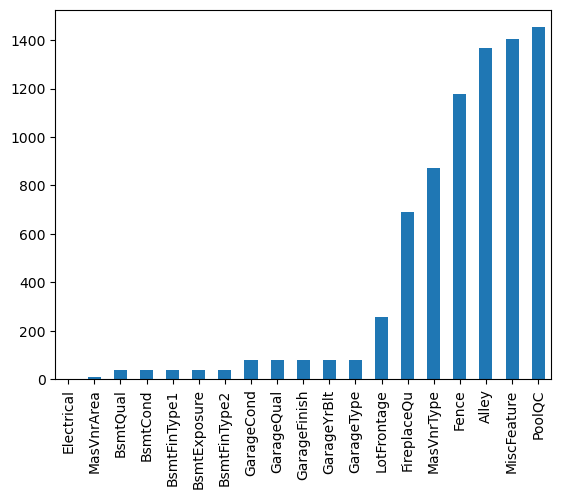

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import os

# Load the data
train_df = pd.read_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/test.csv')
sample_submission = pd.read_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/sample_submission.csv')

# Initial exploration
print(train_df.head())
print(train_df.info())
print(train_df.describe())

# Check for missing values
missing = train_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

plt.show()


## Feature Engineering

In [2]:
# Fill missing values
train_df.fillna(train_df.median(), inplace=True)
test_df.fillna(test_df.median(), inplace=True)

# Encode categorical variables
label_encoders = {}
for column in train_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = le.transform(test_df[column])
    label_encoders[column] = le

# Feature scaling
scaler = StandardScaler()
train_df[train_df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(train_df.select_dtypes(include=[np.number]))
test_df[test_df.select_dtypes(include=[np.number]).columns] = scaler.transform(test_df.select_dtypes(include=[np.number]))

# Feature selection (example using correlation)
corr_matrix = train_df.corr()
high_corr_features = corr_matrix.index[abs(corr_matrix["SalePrice"]) > 0.5]
plt.figure(figsize=(10,10))
sns.heatmap(train_df[high_corr_features].corr(), annot=True, cmap="coolwarm")
plt.show()

# Use selected features
selected_features = high_corr_features.drop("SalePrice")
X = train_df[selected_features]
y = train_df['SalePrice']


TypeError: Cannot convert [['RL' 'RL' 'RL' ... 'RL' 'RL' 'RL']
 ['Pave' 'Pave' 'Pave' ... 'Pave' 'Pave' 'Pave']
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... 'Shed' nan nan]
 ['WD' 'WD' 'WD' ... 'WD' 'WD' 'WD']
 ['Normal' 'Normal' 'Normal' ... 'Normal' 'Normal' 'Normal']] to numeric

## Handle Missing Values and Encode Categorical Variables

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the data
train_df = pd.read_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/test.csv')

# Fill missing values for numeric features with the median
numeric_features = train_df.select_dtypes(include=[np.number]).columns
train_df[numeric_features] = train_df[numeric_features].fillna(train_df[numeric_features].median())
test_df[numeric_features] = test_df[numeric_features].fillna(test_df[numeric_features].median())

# Fill missing values for categorical features with the mode
categorical_features = train_df.select_dtypes(include=[object]).columns
train_df[categorical_features] = train_df[categorical_features].fillna(train_df[categorical_features].mode().iloc[0])
test_df[categorical_features] = test_df[categorical_features].fillna(test_df[categorical_features].mode().iloc[0])

# Encode categorical variables
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = le.transform(test_df[column])
    label_encoders[column] = le

# Check if there are any remaining missing values
print(train_df.isnull().sum().sum())
print(test_df.isnull().sum().sum())


KeyError: "['SalePrice'] not in index"

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the data
train_df = pd.read_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/test.csv')

# Fill missing values for numeric features with the median
numeric_features = train_df.select_dtypes(include=[np.number]).columns
train_df[numeric_features] = train_df[numeric_features].fillna(train_df[numeric_features].median())
test_df[numeric_features] = test_df[numeric_features].fillna(test_df[numeric_features].median())

# Fill missing values for categorical features with the mode
categorical_features = train_df.select_dtypes(include=[object]).columns
train_df[categorical_features] = train_df[categorical_features].fillna(train_df[categorical_features].mode().iloc[0])
test_df[categorical_features] = test_df[categorical_features].fillna(test_df[categorical_features].mode().iloc[0])

# Encode categorical variables
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = le.transform(test_df[column])
    label_encoders[column] = le

# Check if there are any remaining missing values
print(train_df.isnull().sum().sum())
print(test_df.isnull().sum().sum())


KeyError: "['SalePrice'] not in index"

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the data
train_df = pd.read_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/test.csv')

# Fill missing values for numeric features with the median
numeric_features = train_df.select_dtypes(include=[np.number]).columns
train_df[numeric_features] = train_df[numeric_features].fillna(train_df[numeric_features].median())
test_df[numeric_features] = test_df[numeric_features].fillna(test_df[numeric_features].median())

# Fill missing values for categorical features with the mode
categorical_features = train_df.select_dtypes(include=[object]).columns
train_df[categorical_features] = train_df[categorical_features].fillna(train_df[categorical_features].mode().iloc[0])
test_df[categorical_features] = test_df[categorical_features].fillna(test_df[categorical_features].mode().iloc[0])

# Encode categorical variables
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = le.transform(test_df[column])
    label_encoders[column] = le

# Ensure all columns are encoded correctly
print(train_df.head())
print(test_df.head())


KeyError: "['SalePrice'] not in index"

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the data
train_df = pd.read_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/test.csv')

# Fill missing values for numeric features with the median
numeric_features = train_df.select_dtypes(include=[np.number]).columns
train_df[numeric_features] = train_df[numeric_features].fillna(train_df[numeric_features].median())
test_df[numeric_features] = test_df[numeric_features].fillna(test_df[numeric_features].median())

# Fill missing values for categorical features with the mode
categorical_features = train_df.select_dtypes(include=[object]).columns
train_df[categorical_features] = train_df[categorical_features].fillna(train_df[categorical_features].mode().iloc[0])
test_df[categorical_features] = test_df[categorical_features].fillna(test_df[categorical_features].mode().iloc[0])

# Encode categorical variables
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = le.transform(test_df[column])
    label_encoders[column] = le

# Ensure all columns are encoded correctly
print(train_df.head())
print(test_df.head())


KeyError: "['SalePrice'] not in index"

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the data
train_df = pd.read_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/test.csv')

# Separate target variable from training data
y = train_df['SalePrice']
train_df = train_df.drop(['SalePrice'], axis=1)

# Fill missing values for numeric features with the median
numeric_features = train_df.select_dtypes(include=[np.number]).columns
train_df[numeric_features] = train_df[numeric_features].fillna(train_df[numeric_features].median())
test_df[numeric_features] = test_df[numeric_features].fillna(test_df[numeric_features].median())

# Fill missing values for categorical features with the mode
categorical_features = train_df.select_dtypes(include=[object]).columns
train_df[categorical_features] = train_df[categorical_features].fillna(train_df[categorical_features].mode().iloc[0])
test_df[categorical_features] = test_df[categorical_features].fillna(test_df[categorical_features].mode().iloc[0])

# Encode categorical variables
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = le.transform(test_df[column])
    label_encoders[column] = le

# Ensure all columns are encoded correctly
print(train_df.head())
print(test_df.head())


   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      0         3   
1   2          20         3         80.0     9600       1      0         3   
2   3          60         3         68.0    11250       1      0         0   
3   4          70         3         60.0     9550       1      0         0   
4   5          60         3         84.0    14260       1      0         0   

   LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  Fence  \
0            3          0  ...            0         0       2      2   
1            3          0  ...            0         0       2      2   
2            3          0  ...            0         0       2      2   
3            3          0  ...            0         0       2      2   
4            3          0  ...            0         0       2      2   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0            2        0       2

## Feature Scaling

In [8]:
# Feature scaling
scaler = StandardScaler()
train_df[numeric_features] = scaler.fit_transform(train_df[numeric_features])
test_df[numeric_features] = scaler.transform(test_df[numeric_features])


## Feature Selection and Splitting Data

In [9]:
# Add SalePrice back to the train_df for correlation computation
train_df['SalePrice'] = y

# Selecting high correlation features
corr_matrix = train_df.corr()
high_corr_features = corr_matrix.index[abs(corr_matrix["SalePrice"]) > 0.5]

# Prepare training data
X = train_df[high_corr_features].drop("SalePrice", axis=1)
y = train_df['SalePrice']

# Splitting data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training and Evaluation

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse}")

# Cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-validated RMSE: {-cv_scores.mean()}")


RMSE: 37195.83368735172
Cross-validated RMSE: 36575.27639489314


## Submission

In [11]:
# Predict on test data
test_features = test_df[high_corr_features.drop("SalePrice", axis=0)]
test_predictions = lr.predict(test_features)

# Create submission file
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_predictions})
submission.to_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/submission.csv', index=False)


TypeError: Index.drop() got an unexpected keyword argument 'axis'

## Step 1: Handle Missing Values and Encode Categorical Variables

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the data
train_df = pd.read_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/test.csv')

# Separate target variable from training data
y = train_df['SalePrice']
train_df = train_df.drop(['SalePrice'], axis=1)

# Fill missing values for numeric features with the median
numeric_features = train_df.select_dtypes(include=[np.number]).columns
train_df[numeric_features] = train_df[numeric_features].fillna(train_df[numeric_features].median())
test_df[numeric_features] = test_df[numeric_features].fillna(test_df[numeric_features].median())

# Fill missing values for categorical features with the mode
categorical_features = train_df.select_dtypes(include=[object]).columns
train_df[categorical_features] = train_df[categorical_features].fillna(train_df[categorical_features].mode().iloc[0])
test_df[categorical_features] = test_df[categorical_features].fillna(test_df[categorical_features].mode().iloc[0])

# Encode categorical variables
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = le.transform(test_df[column])
    label_encoders[column] = le

# Ensure all columns are encoded correctly
print(train_df.head())
print(test_df.head())


   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      0         3   
1   2          20         3         80.0     9600       1      0         3   
2   3          60         3         68.0    11250       1      0         0   
3   4          70         3         60.0     9550       1      0         0   
4   5          60         3         84.0    14260       1      0         0   

   LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  Fence  \
0            3          0  ...            0         0       2      2   
1            3          0  ...            0         0       2      2   
2            3          0  ...            0         0       2      2   
3            3          0  ...            0         0       2      2   
4            3          0  ...            0         0       2      2   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0            2        0       2

## Feature Scaling

In [13]:
# Feature scaling
scaler = StandardScaler()
train_df[numeric_features] = scaler.fit_transform(train_df[numeric_features])
test_df[numeric_features] = scaler.transform(test_df[numeric_features])


## Feature Selection and Splitting Data

In [14]:
# Add SalePrice back to the train_df for correlation computation
train_df['SalePrice'] = y

# Selecting high correlation features
corr_matrix = train_df.corr()
high_corr_features = corr_matrix.index[abs(corr_matrix["SalePrice"]) > 0.5]

# Prepare training data
X = train_df[high_corr_features.drop("SalePrice")]
y = train_df['SalePrice']

# Splitting data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training and Evaluation

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse}")

# Cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-validated RMSE: {-cv_scores.mean()}")


RMSE: 37195.83368735172
Cross-validated RMSE: 36575.27639489314


## Submission

In [16]:
# Predict on test data
test_features = test_df[high_corr_features.drop("SalePrice")]
test_predictions = lr.predict(test_features)

# Create submission file
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_predictions})
submission.to_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/submission.csv', index=False)


this failed; told it to match the format of sample_submission.csv

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the data
train_df = pd.read_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/test.csv')
sample_submission = pd.read_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/sample_submission.csv')

# Separate target variable from training data
y = train_df['SalePrice']
train_df = train_df.drop(['SalePrice'], axis=1)

# Fill missing values for numeric features with the median
numeric_features = train_df.select_dtypes(include=[np.number]).columns
train_df[numeric_features] = train_df[numeric_features].fillna(train_df[numeric_features].median())
test_df[numeric_features] = test_df[numeric_features].fillna(test_df[numeric_features].median())

# Fill missing values for categorical features with the mode
categorical_features = train_df.select_dtypes(include=[object]).columns
train_df[categorical_features] = train_df[categorical_features].fillna(train_df[categorical_features].mode().iloc[0])
test_df[categorical_features] = test_df[categorical_features].fillna(test_df[categorical_features].mode().iloc[0])

# Encode categorical variables
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = le.transform(test_df[column])
    label_encoders[column] = le

# Ensure all columns are encoded correctly
print(train_df.head())
print(test_df.head())


   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      0         3   
1   2          20         3         80.0     9600       1      0         3   
2   3          60         3         68.0    11250       1      0         0   
3   4          70         3         60.0     9550       1      0         0   
4   5          60         3         84.0    14260       1      0         0   

   LandContour  Utilities  ...  ScreenPorch  PoolArea  PoolQC  Fence  \
0            3          0  ...            0         0       2      2   
1            3          0  ...            0         0       2      2   
2            3          0  ...            0         0       2      2   
3            3          0  ...            0         0       2      2   
4            3          0  ...            0         0       2      2   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0            2        0       2

In [18]:
# Feature scaling
scaler = StandardScaler()
train_df[numeric_features] = scaler.fit_transform(train_df[numeric_features])
test_df[numeric_features] = scaler.transform(test_df[numeric_features])


In [19]:
# Add SalePrice back to the train_df for correlation computation
train_df['SalePrice'] = y

# Selecting high correlation features
corr_matrix = train_df.corr()
high_corr_features = corr_matrix.index[abs(corr_matrix["SalePrice"]) > 0.5]

# Prepare training data
X = train_df[high_corr_features.drop("SalePrice")]
y = train_df['SalePrice']

# Splitting data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse}")

# Cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-validated RMSE: {-cv_scores.mean()}")


RMSE: 37195.83368735172
Cross-validated RMSE: 36575.27639489314


In [21]:
# Predict on test data
test_features = test_df[high_corr_features.drop("SalePrice")]
test_predictions = lr.predict(test_features)

# Create submission file matching the format of sample_submission.csv
submission = pd.DataFrame({'Id': sample_submission['Id'], 'SalePrice': test_predictions})
submission.to_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/submission.csv', index=False)


got a 0.18 number 3871 see if we can improve this

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the data
train_df = pd.read_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/test.csv')
sample_submission = pd.read_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/sample_submission.csv')

# Separate target variable from training data
y = train_df['SalePrice']
train_df = train_df.drop(['SalePrice'], axis=1)

# List of numerical and categorical features
numeric_features = train_df.select_dtypes(include=[np.number]).columns
categorical_features = train_df.select_dtypes(include=[object]).columns

# Preprocessing pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply the transformations
X_train = preprocessor.fit_transform(train_df)
X_test = preprocessor.transform(test_df)


In [23]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define models and their hyperparameters for GridSearchCV
models = {
    'ridge': Ridge(),
    'lasso': Lasso(),
    'elasticnet': ElasticNet(),
    'gbr': GradientBoostingRegressor(),
    'rf': RandomForestRegressor(),
    'xgb': XGBRegressor()
}

params = {
    'ridge': {'alpha': [0.1, 1.0, 10.0]},
    'lasso': {'alpha': [0.01, 0.1, 1.0]},
    'elasticnet': {'alpha': [0.1, 1.0], 'l1_ratio': [0.2, 0.5, 0.8]},
    'gbr': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]},
    'rf': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
    'xgb': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
}

best_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, params[name], cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y)
    best_models[name] = grid_search.best_estimator_
    print(f"Best params for {name}: {grid_search.best_params_}")
    print(f"Best CV score for {name}: {-grid_search.best_score_}")

# Select the best model based on CV score
best_model_name = min(best_models, key=lambda k: -cross_val_score(best_models[k], X_train, y, cv=5, scoring='neg_root_mean_squared_error').mean())
best_model = best_models[best_model_name]

# Train the best model on the entire training set
best_model.fit(X_train, y)

# Predict on test data
test_predictions = best_model.predict(X_test)

# Create submission file matching the format of sample_submission.csv
submission = pd.DataFrame({'Id': sample_submission['Id'], 'SalePrice': test_predictions})
submission.to_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/submission.csv', index=False)

print(f"Best model: {best_model_name}")


Training ridge...


/Users/john/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/john/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/john/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/john/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/john/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires ver

Best params for ridge: {'alpha': 10.0}
Best CV score for ridge: 31111.85506302248
Training lasso...


/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117679256561.79984, tolerance: 724930391.3116125
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117453682752.80618, tolerance: 724930391.3116125
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80073388411.82462, tolerance: 770619031.1834052
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/lin

Best params for lasso: {'alpha': 0.01}
Best CV score for lasso: 34465.373672339054
Training elasticnet...
Best params for elasticnet: {'alpha': 0.1, 'l1_ratio': 0.8}
Best CV score for elasticnet: 31045.49724883262
Training gbr...
Best params for gbr: {'learning_rate': 0.1, 'n_estimators': 200}
Best CV score for gbr: 26277.917296814092
Training rf...
Best params for rf: {'max_depth': 20, 'n_estimators': 200}
Best CV score for rf: 29806.78523122042
Training xgb...
Best params for xgb: {'learning_rate': 0.1, 'n_estimators': 200}
Best CV score for xgb: 26981.828436640866


/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101954032534.39963, tolerance: 759214014.2531193
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104518385704.79805, tolerance: 728773513.0259368
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71706623569.40408, tolerance: 699031751.5199751
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/lin

Best model: gbr


In [24]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define models and their hyperparameters for GridSearchCV
models = {
    'ridge': Ridge(),
    'lasso': Lasso(),
    'elasticnet': ElasticNet(),
    'gbr': GradientBoostingRegressor(),
    'rf': RandomForestRegressor(),
    'xgb': XGBRegressor()
}

params = {
    'ridge': {'alpha': [0.1, 1.0, 10.0]},
    'lasso': {'alpha': [0.01, 0.1, 1.0]},
    'elasticnet': {'alpha': [0.1, 1.0], 'l1_ratio': [0.2, 0.5, 0.8]},
    'gbr': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]},
    'rf': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
    'xgb': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
}

best_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, params[name], cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y)
    best_models[name] = grid_search.best_estimator_
    print(f"Best params for {name}: {grid_search.best_params_}")
    print(f"Best CV score for {name}: {-grid_search.best_score_}")

# Select the best model based on CV score
best_model_name = min(best_models, key=lambda k: -cross_val_score(best_models[k], X_train, y, cv=5, scoring='neg_root_mean_squared_error').mean())
best_model = best_models[best_model_name]

# Print the best model's hyperparameters
print(f"Best model: {best_model_name}")
print(f"Hyperparameters of the best model: {best_model.get_params()}")

# Train the best model on the entire training set
best_model.fit(X_train, y)

# Predict on test data
test_predictions = best_model.predict(X_test)

# Create submission file matching the format of sample_submission.csv
submission = pd.DataFrame({'Id': sample_submission['Id'], 'SalePrice': test_predictions})
submission.to_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/submission.csv', index=False)


Training ridge...


/Users/john/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/john/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/john/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/john/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/john/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires ver

Best params for ridge: {'alpha': 10.0}
Best CV score for ridge: 31111.85506302248
Training lasso...


/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117679256561.79984, tolerance: 724930391.3116125
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70953124805.89368, tolerance: 728773513.0259368
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51713889291.65961, tolerance: 759214014.2531193
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/line

Best params for lasso: {'alpha': 0.01}
Best CV score for lasso: 34465.373672339054
Training elasticnet...
Best params for elasticnet: {'alpha': 0.1, 'l1_ratio': 0.8}
Best CV score for elasticnet: 31045.49724883262
Training gbr...
Best params for gbr: {'learning_rate': 0.1, 'n_estimators': 200}
Best CV score for gbr: 26013.877054701792
Training rf...
Best params for rf: {'max_depth': 20, 'n_estimators': 100}
Best CV score for rf: 29853.01832757257
Training xgb...
Best params for xgb: {'learning_rate': 0.1, 'n_estimators': 200}
Best CV score for xgb: 26981.828436640866


/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101954032534.39963, tolerance: 759214014.2531193
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104518385704.79805, tolerance: 728773513.0259368
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71706623569.40408, tolerance: 699031751.5199751
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/lin

Best model: gbr
Hyperparameters of the best model: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [25]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define models and their hyperparameters for GridSearchCV
models = {
    'ridge': Ridge(),
    'lasso': Lasso(),
    'elasticnet': ElasticNet(),
    'gbr': GradientBoostingRegressor(),
    'rf': RandomForestRegressor(),
    'xgb': XGBRegressor()
}

params = {
    'ridge': {'alpha': [0.1, 1.0, 10.0]},
    'lasso': {'alpha': [0.01, 0.1, 1.0]},
    'elasticnet': {'alpha': [0.1, 1.0], 'l1_ratio': [0.2, 0.5, 0.8]},
    'gbr': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]},
    'rf': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
    'xgb': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
}

best_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, params[name], cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y)
    best_models[name] = grid_search.best_estimator_
    print(f"Best params for {name}: {grid_search.best_params_}")
    print(f"Best CV score for {name}: {-grid_search.best_score_}")

# Select the best model based on CV score
best_model_name = min(best_models, key=lambda k: -cross_val_score(best_models[k], X_train, y, cv=5, scoring='neg_root_mean_squared_error').mean())
best_model = best_models[best_model_name]

# Print the best model's hyperparameters
print(f"Best model: {best_model_name}")
print(f"Hyperparameters of the best model: {best_model.get_params()}")


Training ridge...


/Users/john/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/john/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/john/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/john/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/john/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires ver

Best params for ridge: {'alpha': 10.0}
Best CV score for ridge: 31111.85506302248
Training lasso...


/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117679256561.79984, tolerance: 724930391.3116125
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101954032534.39963, tolerance: 759214014.2531193
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51713889291.65961, tolerance: 759214014.2531193
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/lin

Best params for lasso: {'alpha': 0.01}
Best CV score for lasso: 34465.373672339054
Training elasticnet...
Best params for elasticnet: {'alpha': 0.1, 'l1_ratio': 0.8}
Best CV score for elasticnet: 31045.49724883262
Training gbr...
Best params for gbr: {'learning_rate': 0.1, 'n_estimators': 200}
Best CV score for gbr: 25883.561544934433
Training rf...
Best params for rf: {'max_depth': None, 'n_estimators': 200}
Best CV score for rf: 29696.145224493044
Training xgb...
Best params for xgb: {'learning_rate': 0.1, 'n_estimators': 200}
Best CV score for xgb: 26981.828436640866


/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101954032534.39963, tolerance: 759214014.2531193
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104518385704.79805, tolerance: 728773513.0259368
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71706623569.40408, tolerance: 699031751.5199751
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/john/anaconda3/lib/python3.11/site-packages/sklearn/lin

Best model: gbr
Hyperparameters of the best model: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [26]:
# Train the best model on the entire training set
best_model.fit(X_train, y)

# Predict on test data
test_predictions = best_model.predict(X_test)

# Create submission file matching the format of sample_submission.csv
submission = pd.DataFrame({'Id': sample_submission['Id'], 'SalePrice': test_predictions})
submission.to_csv('/Users/john/Downloads/house-prices-advanced-regression-techniques/submission.csv', index=False)

print(f"Submission file created using the best model: {best_model_name} with hyperparameters: {best_model.get_params()}")


Submission file created using the best model: gbr with hyperparameters: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
